# Tahap 1: Pemahaman Data Awal (Initial Data Understanding)

Mengapa Tahapan Ini Penting?
Sebelum melakukan pembersihan atau pelatihan model, kita harus benar-benar memahami data yang kita miliki. Ini seperti seorang mekanik yang ingin memperbaiki mobil—tentu ia perlu tahu jenis, kondisi, dan bagian-bagian mobil sebelum mulai menyetel.

Tahap ini membantu kita:
- Mengenali struktur dan isi dataset
- Menemukan nilai yang hilang atau mencurigakan
- Memahami korelasi potensial antara fitur dengan target (transmission)
- Memutuskan fitur mana yang relevan atau perlu dihapus



# Deskripsi Sistem: Prediksi Jenis Transmisi Mobil Berdasarkan Fitur-Fitur Kendaraan

1. Abstrak

Sistem ini dirancang untuk memprediksi jenis transmisi mobil (Manual atau Automatic) berdasarkan sejumlah atribut mobil seperti tahun pembuatan, harga jual, jenis bahan bakar, dan nama/model mobil. Prediksi ini berguna bagi dealer, pembeli mobil bekas, maupun platform jual-beli mobil yang ingin memberikan informasi lebih cepat dan akurat mengenai spesifikasi mobil.

2. Tujuan Sistem

- Membantu klasifikasi otomatis jenis transmisi untuk mobil bekas
- Meningkatkan efisiensi pencarian dan filter dalam aplikasi jual beli
- Memberikan insight tren jenis transmisi berdasarkan spesifikasi mobil

3. Metodologi dan Cara Kerja

  1. Pengumpulan Data: Dataset mobil bekas dikumpulkan dari sumber publik (misalnya Kaggle).
  2. Pra-pemrosesan: Dilakukan pembersihan data, encoding untuk data kategorikal, dan normalisasi numerik jika diperlukan.
  3. Modeling: Menggunakan algoritma klasifikasi seperti Decision Tree, Random Forest, atau Logistic Regression untuk mempelajari pola dari data.
  4. Evaluasi: Menilai akurasi prediksi model terhadap data test.
  5. Output: Model akan memprediksi apakah mobil cenderung bertransmisi Manual atau Automatic berdasarkan input fitur.

4. Atribut Kunci yang Dianalisis

make_year → Tahun mobil diproduksi. Mobil yang lebih baru biasanya lebih banyak menggunakan transmisi otomatis, sedangkan mobil lama cenderung manual. Jadi, tahun produksi bisa menjadi indikator kuat.

mileage_kmpl → Menggambarkan efisiensi bahan bakar. Transmisi otomatis dan manual dapat menghasilkan efisiensi yang berbeda tergantung mesin dan teknologi, sehingga bisa berpengaruh.

engine_cc → Kapasitas mesin. Mesin dengan cc besar biasanya digunakan pada mobil performa tinggi, yang cenderung menggunakan transmisi otomatis. Jadi, fitur ini bisa berkorelasi dengan jenis transmisi.

fuel_type → Jenis bahan bakar (bensin, solar, listrik, dll). Mobil listrik misalnya, hampir selalu otomatis. Jadi jenis bahan bakar bisa memberikan informasi tambahan terhadap tipe transmisi.

brand → Merek mobil. Beberapa brand lebih sering memproduksi mobil otomatis atau manual tergantung segmentasi pasarnya. Jadi, brand bisa menjadi indikator kebiasaan desain.

price_usd → Digunakan untuk Analisis Unvariant jadi lewat price_usd

5. Atribut yang Diabaikan / Dihapus

owner_count : Tidak langsung berhubungan dengan jenis transmisi

accidents_reported : Korelasi terhadap transmisi lemah

service_history : Banyak data kosong (null), dan juga tidak berpengaruh langsung

insurance_valid : Status asuransi tidak berkaitan dengan jenis transmisi

color : Warna mobil tidak logis memengaruhi sistem transmisi

1. Persiapan & Import Library

In [ ]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving used_car_price_dataset.csv to used_car_price_dataset (9).csv


# Menampilkan 5 baris pertama dari dataset

In [ ]:
df = pd.read_csv("used_car_price_dataset.csv")
print("Lima baris pertama dataset:")
df.head()

Lima baris pertama dataset:


,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


# Menampilkan informasi ringkas tentang DataFrame

In [ ]:
print("\nInformasi struktural dataset:")
df.info()


Informasi struktural dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


# Menampilkan jumlah baris dan kolom

In [ ]:
print(f"\nDimensi dataset (baris, kolom): {df.shape}")


Dimensi dataset (baris, kolom): (10000, 12)


# Statistik Deskriptif pada Dataset Mobil
Perintah df.describe() menghasilkan ringkasan statistik untuk kolom numerik dalam dataset mobil bekas.

Tujuan: Memberikan wawasan awal terhadap karakteristik fitur-fitur numerik seperti tahun pembuatan, kapasitas mesin, dan efisiensi bahan bakar.

Penjelasan Output:
count: Jumlah data valid (tidak kosong/null). Menunjukkan kelengkapan data di tiap kolom.

mean: Rata-rata dari kolom tersebut.
Contoh: Rata-rata mileage_kmpl bisa memberi gambaran umum efisiensi bahan bakar kendaraan.

std: Standar deviasi — menunjukkan seberapa bervariasi data.
Misalnya, engine_cc dengan deviasi besar berarti banyak variasi ukuran mesin dalam dataset.

min: Nilai minimum.
Contoh: make_year minimum bisa menunjukkan tahun mobil tertua yang ada dalam dataset.

25%, 50% (median), 75%: Kuartil yang membagi data menjadi empat bagian.
Median (50%) dapat memberi gambaran titik tengah distribusi data.
Perbedaan besar antara median dan mean bisa menunjukkan distribusi miring atau outlier.

max: Nilai maksimum dalam kolom.
Contoh: engine_cc tertinggi bisa jadi mobil sport atau SUV bertenaga besar.

In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
df.describe()


Statistik deskriptif untuk kolom numerik:


,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


# Tahap 2: Pembersihan Data (Data Cleaning)

Mengapa Tahapan Ini Penting?
Ini adalah fase di mana kita secara aktif memperbaiki dan menyaring data mentah agar siap digunakan oleh algoritma Machine Learning. Model tidak bisa membedakan mana data yang masuk akal dan mana yang penuh kesalahan—itu tugas kita.

Tahapan pembersihan ini meningkatkan kualitas, akurasi, dan keandalan prediksi dengan memastikan model hanya belajar dari informasi yang benar dan relevan, bukan dari data yang tidak konsisten, salah, atau tidak bermakna.

Implementasi di Google Colab: Pembersihan Data Mobil

Kita akan melakukan beberapa tahapan pembersihan data secara sistematis, termasuk penggantian nama kolom, penanganan nilai kosong, penghapusan fitur yang tidak relevan, dan sebagainya.

2.1. Penggantian Nama Kolom (Column Renaming)
Pentingnya:
Nama kolom seperti acc_rptd atau own_ct mungkin singkat, tapi tidak jelas artinya. Nama yang deskriptif seperti accidents_reported atau owner_count lebih mudah dipahami dan membuat kode lebih terbaca, baik oleh diri kita sendiri di masa depan maupun oleh rekan tim lain.

Strategi:
Kita membuat kamus (dictionary) Python yang memetakan nama-nama lama ke nama-nama baru yang lebih jelas. Lalu kita gunakan metode .rename() pada DataFrame.

In [ ]:
# Pemetaan nama
column_mapping = {
    'make_year': 'Make_Year',
    'mileage_kmpl': 'Mileage_Kmpl',
    'engine_cc': 'Engine_CC',
    'fuel_type': 'Fuel_Type',
    'owner_count': 'Owner_Count',
    'price_usd': 'Price_USD',
    'brand': 'Brand',
    'transmission': 'Transmission',
    'color': 'Color',
    'service_history': 'Service_History',
    'accidents_reported': 'Accidents_Reported',
    'insurance_valid': 'Insurance_Valid'
}

# Ubah nama kolom
df.rename(columns=column_mapping, inplace=True)

print("Nama kolom setelah diubah:")
print(df.columns)


Nama kolom setelah diubah:
Index(['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Fuel_Type', 'Owner_Count',
       'Price_USD', 'Brand', 'Transmission', 'Color', 'Service_History',
       'Accidents_Reported', 'Insurance_Valid'],
      dtype='object')


In [ ]:
print("\nInformasi struktural dataset:")
df.info()


Informasi struktural dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make_Year           10000 non-null  int64  
 1   Mileage_Kmpl        10000 non-null  float64
 2   Engine_CC           10000 non-null  int64  
 3   Fuel_Type           10000 non-null  object 
 4   Owner_Count         10000 non-null  int64  
 5   Price_USD           10000 non-null  float64
 6   Brand               10000 non-null  object 
 7   Transmission        10000 non-null  object 
 8   Color               10000 non-null  object 
 9   Service_History     7962 non-null   object 
 10  Accidents_Reported  10000 non-null  int64  
 11  Insurance_Valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


# 2.2. Penghapusan Kolom yang Tidak Relevan (Dropping Irrelevant Columns)

Pentingnya: Tidak semua data berguna. Beberapa kolom justru dapat menurunkan performa model.

- owner_count : Tidak memiliki hubungan langsung dengan sistem transmisi. Banyak atau sedikitnya pemilik sebelumnya tidak memengaruhi jenis transmisi mobil.

- accidents_reported : Jumlah kecelakaan yang pernah terjadi pada mobil. Korelasi dengan transmisi sangat lemah, dan bisa jadi data ini lebih cocok untuk analisis risiko atau nilai jual kembali.

- service_history : Riwayat servis. Banyak nilai kosong (missing/NaN), dan secara langsung tidak menunjukkan hubungan kuat dengan jenis transmisi.

- insurance_valid : Status asuransi aktif atau tidak. Ini lebih bersifat administratif dan tidak berkaitan dengan teknologi transmisi kendaraan.

- color : Warna mobil. Secara logika, warna tidak mungkin memengaruhi jenis transmisi, sehingga diabaikan dalam analisis.

Strategi: Kita buat daftar berisi nama-nama kolom yang akan dihapus, lalu gunakan metode .drop().

In [ ]:
# Daftar kolom yang ingin dihapus karena tidak relevan terhadap prediksi transmisi
columns_to_drop = [
    'Owner_Count',         # Tidak langsung berhubungan dengan jenis transmisi
    'Accidents_Reported',  # Korelasi terhadap transmisi lemah
    'Service_History',     # Banyak data kosong (null), dan tidak berpengaruh langsung
    'Insurance_Valid',     # Status asuransi tidak berkaitan dengan jenis transmisi
    'Brand',               # Sulit untuk mengetahui jika lewat nama
    'Color',               # Warna mobil tidak logis memengaruhi sistem transmisi
]

# Menghapus kolom-kolom tersebut dari DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Menampilkan informasi setelah penghapusan
print(f"\nJumlah kolom setelah penghapusan: {df.shape[1]}")
print("Kolom yang tersisa:")
print(df.columns)



Jumlah kolom setelah penghapusan: 6
Kolom yang tersisa:
Index(['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Fuel_Type', 'Price_USD',
       'Transmission'],
      dtype='object')


In [ ]:
print("\nInformasi struktural dataset:")
df.info()


Informasi struktural dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make_Year     10000 non-null  int64  
 1   Mileage_Kmpl  10000 non-null  float64
 2   Engine_CC     10000 non-null  int64  
 3   Fuel_Type     10000 non-null  object 
 4   Price_USD     10000 non-null  float64
 5   Transmission  10000 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


# 2.3. Penanganan Nilai yang Hilang (Handling Missing Values)

Pentingnya: Sebagian besar algoritma machine learning tidak dapat memproses data yang mengandung nilai NaN (Not a Number). Mengabaikannya akan menyebabkan error. Menghapus baris yang memiliki nilai hilang bisa menjadi pilihan, tetapi jika data yang hilang banyak, kita akan kehilangan informasi berharga. Oleh karena itu, kita perlu strategi pengisian (imputation) yang cerdas.

Strategi:

1. Deteksi: Gunakan df.isnull().sum() untuk menghitung jumlah nilai hilang di setiap kolom.
2. Dikarenakan disini tidak ada nilai Null maka kita akan lanjut ke langkah berikutnya

In [ ]:
print(df.isnull().sum())

Make_Year       0
Mileage_Kmpl    0
Engine_CC       0
Fuel_Type       0
Price_USD       0
Transmission    0
dtype: int64


# 2.4. Penanganan Inkonsistensi dan Konversi Tipe Data (Dataset Mobil)

Konsistensi adalah kunci. Komputer menganggap "Manual", "manual", dan "MANUAL" sebagai tiga kategori yang berbeda. Jika tidak diseragamkan, maka analisis akan salah atau membingungkan.
Selain itu, memastikan tipe data sudah benar—misalnya:

Kolom transmission diubah dari teks menjadi angka (Manual → 0, Automatic → 1)

Kolom fuel juga diubah ke angka (misalnya: Bensin → 0, Diesel → 1, Listrik → 2)

Ini penting untuk efisiensi memori, kecepatan proses, dan agar data bisa dibaca dengan benar oleh algoritma machine learning.

In [ ]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

print("\nNilai unik pada kolom target setelah konversi:")
print(df['Transmission'].value_counts())


Nilai unik pada kolom target setelah konversi:
Transmission
0    5985
1    4015
Name: count, dtype: int64


# Tahap 3: Analisis Data Eksploratif (EDA)

Mengapa Tahapan Ini Penting?
Jika proses pembersihan data diibaratkan seperti merapikan sebuah bengkel mobil—menghilangkan oli bocor, memungut baut yang tercecer—maka EDA (Exploratory Data Analysis) adalah saat kita mulai menelusuri setiap komponen mobil, melihat bagaimana performanya, dan memahami bagaimana satu bagian mempengaruhi bagian lainnya.

Pada dataset mobil yang sedang kita analisis, EDA menjadi langkah penting karena kita ingin memahami secara menyeluruh karakteristik mobil-mobil tersebut sebelum melakukan pemodelan. Beberapa tujuan utama dari EDA yang kita lakukan antara lain:

Memahami Distribusi Variabel

Mengidentifikasi Outlier

Menemukan Hubungan Antara Variabel

Menguji Asumsi

Menghasilkan Hipotesis untuk Tahapan Selanjutnya

In [ ]:
# Mengimpor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi agar lebih menarik
sns.set_style('whitegrid')

# 3.1. Analisis Univariat (Menganalisis Satu Variabel)

Pentingnya:
Memahami karakteristik tiap variabel satu per satu sangat penting sebelum menganalisis hubungan antar variabel. Analisis univariat membantu:

Mengetahui distribusi nilai dari suatu fitur (contoh: harga mobil).

Melihat apakah nilai-nilainya tersebar normal atau tidak.

Menemukan adanya pencilan (outlier).

Memberi gambaran awal sebelum analisis lebih kompleks.

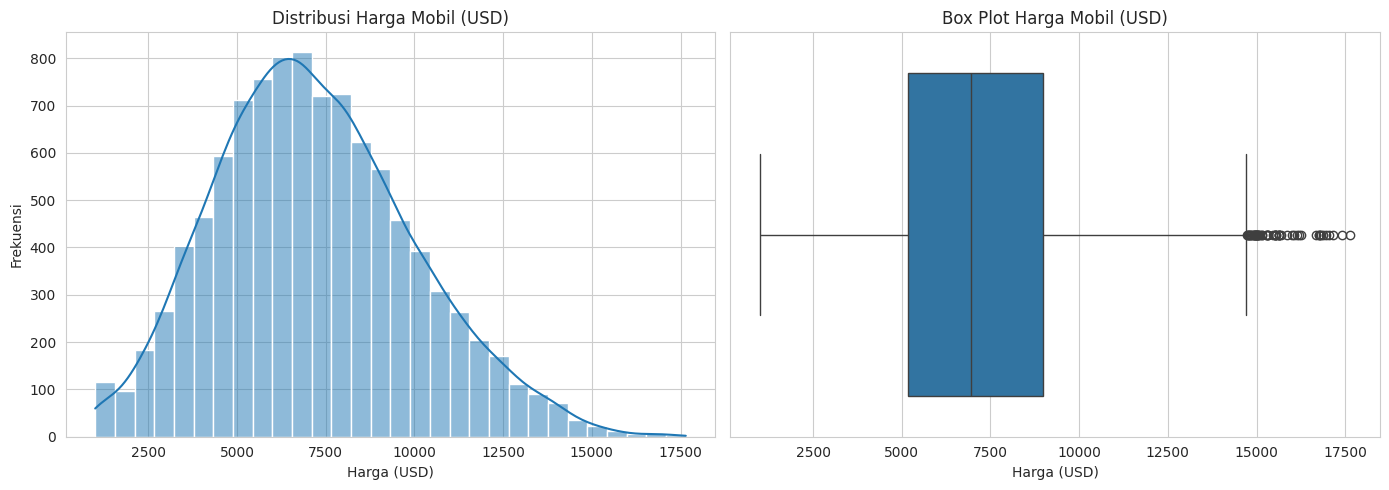

In [ ]:
plt.figure(figsize=(14, 5))

# Plot 1: Histogram untuk Price_USD
plt.subplot(1, 2, 1)
sns.histplot(df['Price_USD'], kde=True, bins=30)
plt.title('Distribusi Harga Mobil (USD)')
plt.xlabel('Harga (USD)')
plt.ylabel('Frekuensi')

# Plot 2: Box Plot untuk Price_USD
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price_USD'])
plt.title('Box Plot Harga Mobil (USD)')
plt.xlabel('Harga (USD)')

plt.tight_layout()
plt.show()


Interpretasi:
Dari plot ini, kita bisa melihat jenis bahan bakar mobil yang paling umum digunakan, apakah lebih banyak mobil berbahan bakar bensin (petrol), diesel, atau jenis lainnya.
Visualisasi ini membantu kita memahami preferensi pasar atau tren industri otomotif berdasarkan jenis bahan bakarnya.

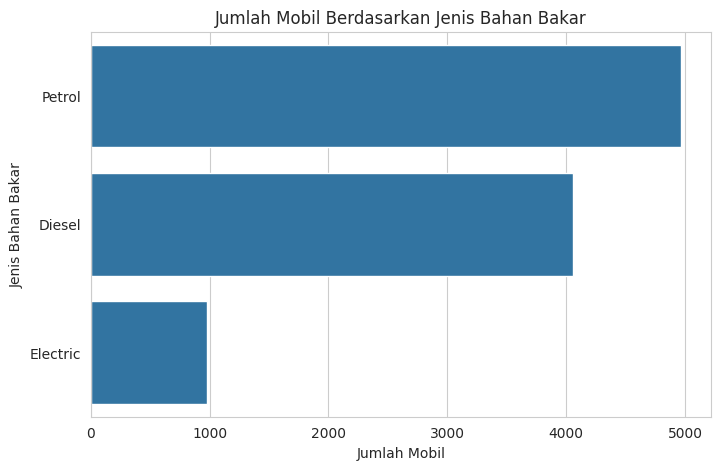

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['Fuel_Type'], order=df['Fuel_Type'].value_counts().index)
plt.title('Jumlah Mobil Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jumlah Mobil')
plt.ylabel('Jenis Bahan Bakar')
plt.show()


# 3.2. Analisis Bivariat (Menganalisis Hubungan Dua Variabel)

Pentingnya:
Ini bagian penting dari EDA, karena kita mencoba menghubungkan fitur kategorikal (Transmission) dengan target numerik (Price_USD).

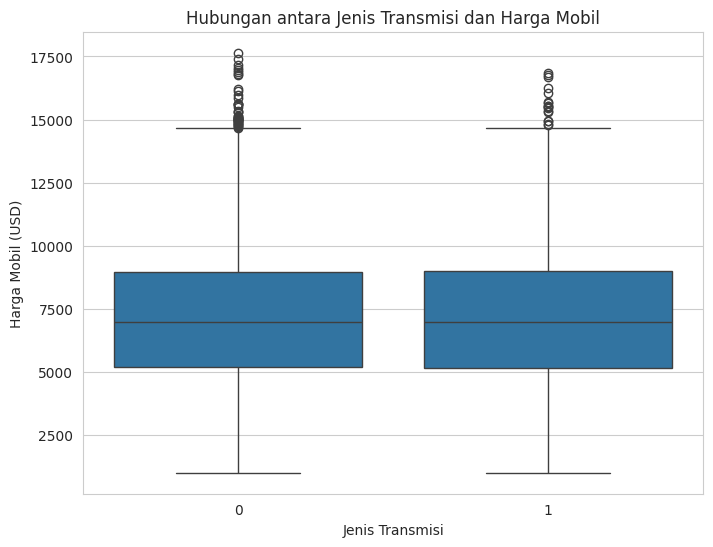

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price_USD', data=df)
plt.title('Hubungan antara Jenis Transmisi dan Harga Mobil')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Harga Mobil (USD)')
plt.show()


In [ ]:
print("\nInformasi struktural dataset:")
df.info()


Informasi struktural dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make_Year     10000 non-null  int64  
 1   Mileage_Kmpl  10000 non-null  float64
 2   Engine_CC     10000 non-null  int64  
 3   Fuel_Type     10000 non-null  object 
 4   Price_USD     10000 non-null  float64
 5   Transmission  10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Membandingkan jumlah mobil berdasarkan jenis transmisi, dan memecahnya berdasarkan kategori tertentu.

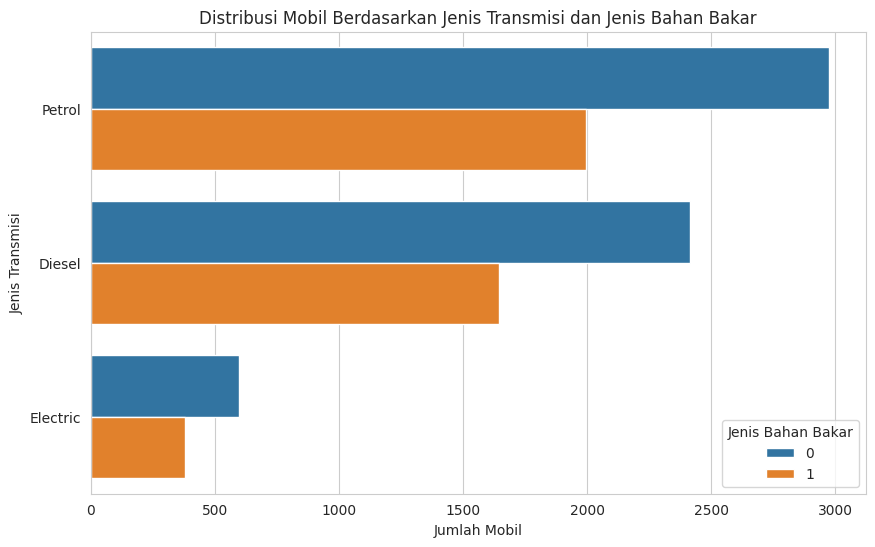

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Fuel_Type', hue='Transmission', data=df, order=df['Fuel_Type'].value_counts().index)
plt.title('Distribusi Mobil Berdasarkan Jenis Transmisi dan Jenis Bahan Bakar')
plt.xlabel('Jumlah Mobil')
plt.ylabel('Jenis Transmisi')
plt.legend(title='Jenis Bahan Bakar')
plt.show()


Plot ini memungkinkan kita melihat secara visual distribusi jenis transmisi (manual dan automatic) di setiap jenis bahan bakar (Fuel_Type).

# 3.3. Analisis Multivariat (Melihat Banyak Variabel Sekaligus)

Pentingnya: Visualisasi korelasi sangat penting dalam analisis data karena memungkinkan kita memahami hubungan kompleks antara variabel numerik dalam dataset. Dalam konteks dataset mobil, ini membantu kita mengidentifikasi variabel mana saja yang saling berkaitan — misalnya apakah mobil yang lebih baru cenderung memiliki harga lebih tinggi, atau apakah jarak tempuh mempengaruhi harga jual mobil.

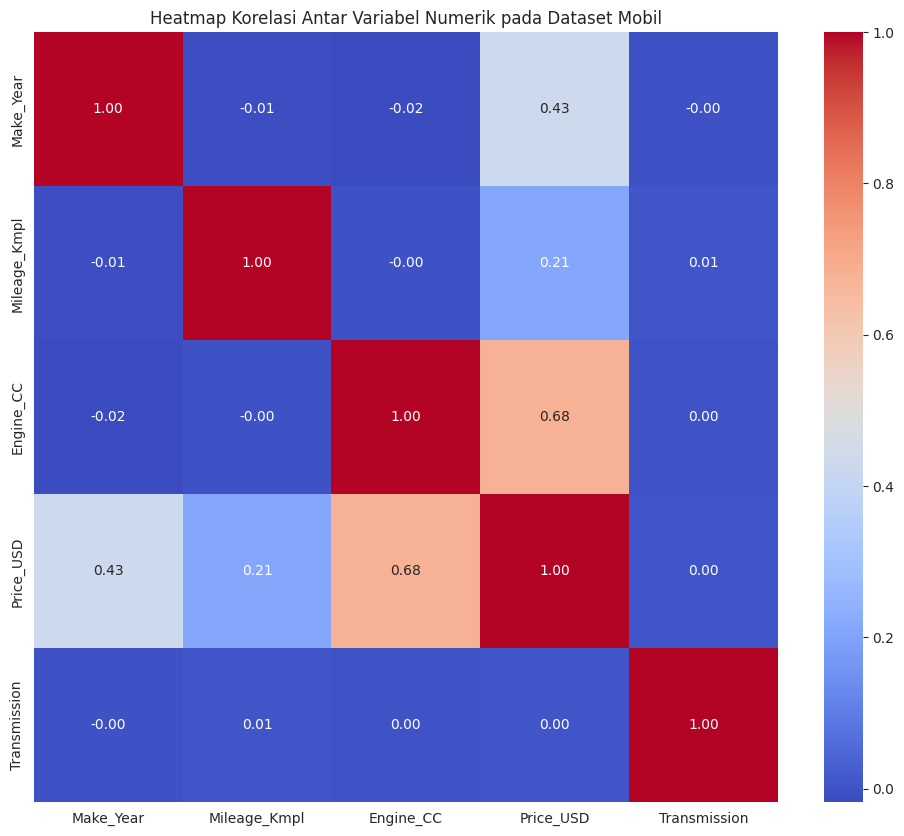

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih hanya kolom numerik dari dataset mobil
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik pada Dataset Mobil')
plt.show()


Interpretasi:
Heatmap ini berguna untuk:

Melihat fitur mana yang paling berkorelasi dengan variabel target, yaitu Transmission.

Mengetahui kekuatan hubungan antara fitur numerik (misal: Engine_CC, Mileage_Kmpl) terhadap jenis transmisi mobil.

Mendeteksi korelasi tinggi antar fitur numerik lainnya yang bisa mempengaruhi hasil model jika terjadi multikolinearitas.

In [ ]:
# Tampilkan semua kolom tanpa dipotong
pd.set_option('display.max_columns', None)           # Jangan batasi jumlah kolom
pd.set_option('display.expand_frame_repr', False)    # Jangan membungkus baris

# Sekarang head() akan menampilkan semua kolom
df.head(20)

,Make_Year,Mileage_Kmpl,Engine_CC,Fuel_Type,Price_USD,Transmission
0,2001,8.17,4000,Petrol,8587.64,0
1,2014,17.59,1500,Petrol,5943.50,0
2,2023,18.09,2500,Diesel,9273.58,1
3,2009,11.28,800,Petrol,6836.24,0
4,2005,12.23,1000,Petrol,4625.79,1
5,2002,13.77,2500,Diesel,6856.03,0
6,2023,12.50,1000,Petrol,6806.77,0
7,2015,17.46,2000,Diesel,7701.84,0
8,2001,14.99,5000,Diesel,8730.52,0
9,2020,19.59,4000,Petrol,10812.16,1


# Tahap 4: Persiapan Data untuk Pemodelan (Data Preparation for Modeling)
Mengapa Tahapan Ini Penting?
Dalam machine learning, algoritma tidak dapat memahami data dalam bentuk teks seperti "Automatic", "Manual", atau "Diesel", "Petrol", dan sebagainya. Semua input harus dikonversi menjadi angka karena algoritma hanyalah serangkaian fungsi matematis. Oleh karena itu, kita perlu mengubah semua fitur kategorikal menjadi format numerik. Selain itu, untuk memastikan evaluasi model yang adil dan akurat, kita juga perlu membagi data menjadi dua bagian: data latih (untuk melatih model) dan data uji (untuk mengevaluasi kinerjanya). Proses ini memastikan bahwa model dapat menggeneralisasi dan tidak hanya menghafal data

# Tahap 4.1: Encoding Variabel Kategorikal

Mengapa Tahapan Ini Penting?
Dalam dataset, beberapa kolom memiliki data dalam bentuk kategori teks, seperti Fuel_Type yang berisi nilai seperti Petrol, Diesel, atau Electric.
Namun, algoritma machine learning hanya memahami angka, bukan teks. Oleh karena itu, kita perlu mengubah kategori tersebut menjadi representasi numerik.

In [ ]:
# Cek nilai unik dan missing value pada kolom Fuel_Type
print("Kategori unik pada kolom Fuel_Type:", df['Fuel_Type'].unique())
if df['Fuel_Type'].isnull().any():
    print("Terdapat missing value pada kolom Fuel_Type, akan diisi dengan 'Unknown'")
    df['Fuel_Type'].fillna('Unknown', inplace=True)

# One-Hot Encoding pada kolom Fuel_Type
# Kami akan melakukan ini setelah pemisahan data agar tidak terjadi data leakage
# Tapi untuk contoh ini, kita lakukan encoding di awal untuk kemudahan
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False)

# Tampilkan info hasil encoding
print("\nKolom setelah One-Hot Encoding:", df_encoded.columns.tolist())
print("Dimensi dataset setelah encoding:", df_encoded.shape)
print("\n5 Data teratas setelah encoding:")
print(df_encoded.head())

Kategori unik pada kolom Fuel_Type: ['Petrol' 'Diesel' 'Electric']

Kolom setelah One-Hot Encoding: ['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Price_USD', 'Transmission', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol']
Dimensi dataset setelah encoding: (10000, 8)

5 Data teratas setelah encoding:
   Make_Year  Mileage_Kmpl  Engine_CC  Price_USD  Transmission  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Petrol
0       2001          8.17       4000    8587.64             0             False               False              True
1       2014         17.59       1500    5943.50             0             False               False              True
2       2023         18.09       2500    9273.58             1              True               False             False
3       2009         11.28        800    6836.24             0             False               False              True
4       2005         12.23       1000    4625.79             1             False            

# 4.2. Pemisahan Fitur (X) dan Target (y)

Pentingnya:
Pemisahan ini penting untuk memisahkan antara fitur-fitur yang akan digunakan untuk memprediksi (X) dan label atau target yang ingin diprediksi (y).
Dalam kasus ini, kita ingin memprediksi jenis bahan bakar (Fuel_Type) berdasarkan fitur lainnya seperti Year, dll.

In [ ]:
# Memisahkan fitur (X) dan target (y) dari data yang sudah di-encoded
# 'Transmission' adalah target, dan semua kolom lainnya adalah fitur
X = df_encoded.drop('Transmission', axis=1)
y = df_encoded['Transmission']

# Menampilkan bentuk/ukuran data fitur dan target
print("Bentuk fitur (X):", X.shape)
print("Bentuk target (y):", y.shape)

# Menampilkan 5 data pertama sebagai contoh
print("\nContoh data fitur (X):")
print(X.head())
print("\nContoh data target (y):")
print(y.head())

Bentuk fitur (X): (10000, 7)
Bentuk target (y): (10000,)

Contoh data fitur (X):
   Make_Year  Mileage_Kmpl  Engine_CC  Price_USD  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Petrol
0       2001          8.17       4000    8587.64             False               False              True
1       2014         17.59       1500    5943.50             False               False              True
2       2023         18.09       2500    9273.58              True               False             False
3       2009         11.28        800    6836.24             False               False              True
4       2005         12.23       1000    4625.79             False               False              True

Contoh data target (y):
0    0
1    0
2    1
3    0
4    1
Name: Transmission, dtype: int64


# 4.3. Pembagian Data Latih dan Data Uji (Train-Test Split)

Pentingnya: Ini adalah langkah paling fundamental dalam validasi model. Kita melatih model pada data latih dan kemudian menguji kinerjanya pada data uji yang belum pernah "dilihat" sebelumnya. Ini mensimulasikan bagaimana model akan berkinerja di dunia nyata dan membantu kita mendeteksi overfitting (ketika model terlalu hafal data latih dan buruk pada data baru).

Strategi: Menggunakan fungsi train_test_split dari scikit-learn. Proporsi umum adalah 80% untuk data latih dan 20% untuk data uji.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (8000, 7)
Ukuran data uji: (2000, 7)


In [ ]:
print("Isi numerical_cols:", numerical_cols)
print("Kolom yang tersedia:", X_train.columns.tolist())


Isi numerical_cols: Index(['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Price_USD', 'Transmission'], dtype='object')
Kolom yang tersedia: ['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Price_USD', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol']


# 4.4. Penskalaan Fitur (Feature Scaling)
Pentingnya:
Beberapa algoritma machine learning seperti Regresi Logistik, SVM, dan KNN sangat sensitif terhadap skala numerik antar fitur. Dalam dataset ini, fitur-fitur seperti Engine_CC (misalnya bernilai ribuan) dan Mileage_Kmpl (biasanya bernilai belasan hingga puluhan) memiliki skala yang sangat berbeda. Tanpa proses penskalaan, algoritma bisa lebih memprioritaskan fitur yang nilainya besar (seperti Price_USD atau Engine_CC) hanya karena skala nilainya, bukan karena pentingnya informasi.

Strategi:
Untuk menghindari bias akibat skala yang berbeda, kita melakukan penskalaan menggunakan StandardScaler dari scikit-learn, yaitu teknik standarisasi dengan cara mengubah data menjadi distribusi dengan rata-rata 0 dan standar deviasi 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Pilih kolom numerik yang perlu di-scale (kolom biner dari encoding tidak perlu)
numerical_cols = ['Make_Year', 'Mileage_Kmpl', 'Engine_CC', 'Price_USD']
categorical_cols = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol'] # Tambahkan kolom hasil encoding lainnya jika ada

# Scaling data numerik di data latih dan uji
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Gabungkan kembali data numerik yang sudah di-scale dengan data kategorikal yang tidak di-scale
X_train_final = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numerical_cols)
X_test_final = pd.DataFrame(X_test_scaled, index=X_test.index, columns=numerical_cols)

# Tambahkan kembali kolom kategorikal ke DataFrame final
X_train_final = pd.concat([X_train_final, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_final, X_test[categorical_cols]], axis=1)

print("\nData siap untuk pemodelan.")
print("\nContoh data latih final:")
print(X_train_final.head())


Data siap untuk pemodelan.

Contoh data latih final:
      Make_Year  Mileage_Kmpl  Engine_CC  Price_USD  Fuel_Type_Diesel  Fuel_Type_Petrol
3987  -0.149369     -0.111785  -1.151562  -0.367575              True             False
7979   0.209009      1.283175  -0.995973  -0.843136              True             False
2653   0.686848     -0.594043   0.170944   0.296010             False              True
8711  -0.388288      0.488048   0.170944  -0.043197              True             False
9445   0.806307      1.042046  -0.218029   0.410292              True             False


#Tahap 5: Pemilihan dan Pelatihan Model

Mengapa Tahapan Ini Penting?

Tidak ada satu model yang sempurna untuk semua masalah. Dengan melatih beberapa jenis model yang berbeda, kita dapat membandingkan kekuatan dan kelemahan masing-masing dan memilih yang paling sesuai untuk kasus penggunaan kita.

Strategi Pemilihan Model:

Kita akan mencoba tiga kandidat kuat untuk masalah klasifikasi biner ini:

Regresi Logistik (Logistic Regression): Model yang sederhana, cepat, dan sangat mudah diinterpretasikan. Ini adalah baseline yang sangat baik untuk memulai.

Random Forest Classifier: Model ensemble yang kuat, terdiri dari banyak "pohon keputusan". Sangat baik dalam menangani hubungan non-linear dan memberikan metrik "pentingnya fitur".

Gradient Boosting Classifier (LightGBM): Model ensemble canggih yang seringkali memberikan akurasi tertinggi. Bekerja dengan membangun pohon secara berurutan, di mana setiap pohon baru mencoba memperbaiki kesalahan pohon sebelumnya.

Implementasi Pelatihan:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Inisialisasi model
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

# Melatih model pada data latih yang sudah diproses
print("Melatih model Regresi Logistik...")
log_reg.fit(X_train_final, y_train)

print("Melatih model Random Forest...")
random_forest.fit(X_train_final, y_train)

print("Melatih model LightGBM...")
lgbm.fit(X_train_final, y_train)

print("\nSemua model telah berhasil dilatih.")

Melatih model Regresi Logistik...
Melatih model Random Forest...
Melatih model LightGBM...
[LightGBM] [Info] Number of positive: 3212, number of negative: 4788
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401500 -> initscore=-0.399219
[LightGBM] [Info] Start training from score -0.399219

Semua model telah berhasil dilatih.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat prediksi pada data uji
y_pred_log_reg = log_reg.predict(X_test_final)
y_pred_rf = random_forest.predict(X_test_final)
y_pred_lgbm = lgbm.predict(X_test_final)

# Mengevaluasi setiap model
print("--- Laporan Klasifikasi: Regresi Logistik ---")
print(classification_report(y_test, y_pred_log_reg))

print("\n--- Laporan Klasifikasi: Random Forest ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Laporan Klasifikasi: LightGBM ---")
print(classification_report(y_test, y_pred_lgbm))

--- Laporan Klasifikasi: Regresi Logistik ---
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1197
           1       0.00      0.00      0.00       803

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.37      2000
weighted avg       0.36      0.60      0.45      2000


--- Laporan Klasifikasi: Random Forest ---
              precision    recall  f1-score   support

           0       0.60      0.75      0.67      1197
           1       0.42      0.26      0.32       803

    accuracy                           0.56      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.53      0.56      0.53      2000


--- Laporan Klasifikasi: LightGBM ---
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      1197
           1       0.35      0.12      0.17       803

    accuracy                           0.56      2000

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1197
           1       0.00      0.00      0.00       803

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.37      2000
weighted avg       0.36      0.60      0.45      2000



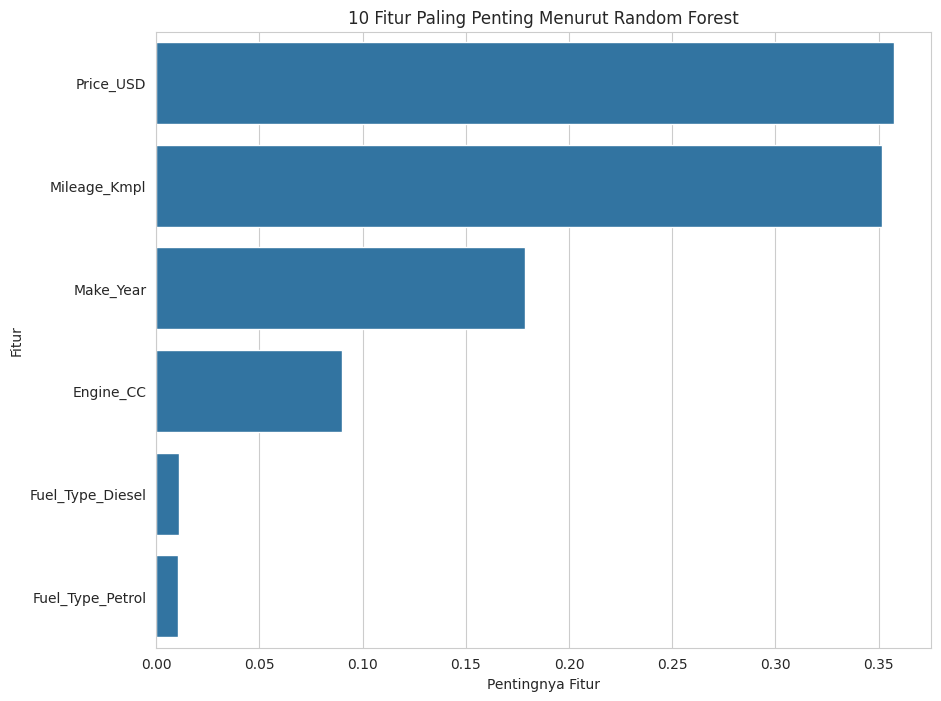

In [ ]:
# Mendapatkan pentingnya fitur dari model Random Forest
feature_importances = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': random_forest.feature_importances_
}).sort_values('importance', ascending=False)

# Visualisasi 10 fitur terpenting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('10 Fitur Paling Penting Menurut Random Forest')
plt.xlabel('Pentingnya Fitur')
plt.ylabel('Fitur')
plt.show()